# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [151]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()
number_mice

249

In [152]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [153]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [155]:
# Checking the number of mice in the clean DataFrame.
clean_numbermice = clean_data["Mouse ID"].nunique()
clean_numbermice

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std= clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                              "Median Tumor Volume":median, 
                                 "Tumor Volume Variance":var, 
                                    "Tumor Volume Std. Dev.":std, 
                                       "Tumor Volume Std. Err.":SEM})

#Displaying the summary statistics
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

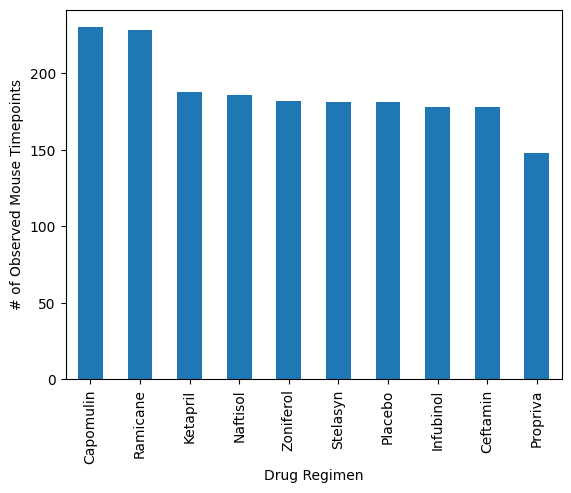

In [158]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Drug Regimen column couting the mice count
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count.plot.bar()
# Set the xlabel, ylabel and creating bar plot using panadas
plot_pandas = mice_count.plot.bar
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

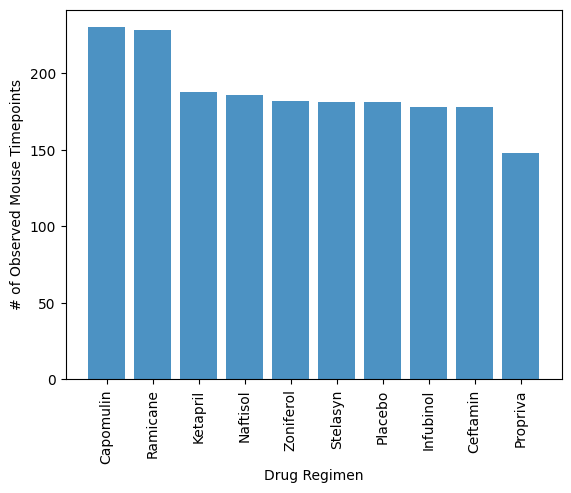

In [159]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Creating a Pyplot bar plot
plt.bar(x_axis, y_axis, alpha=0.8, align='center')

# Setting the xlabel and ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

#Display Plot
plt.show()

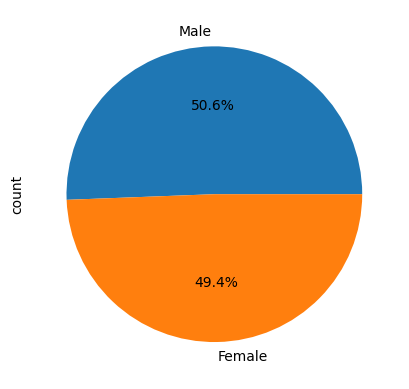

In [160]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = combined_data["Sex"].value_counts()

# Making the pie chart
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

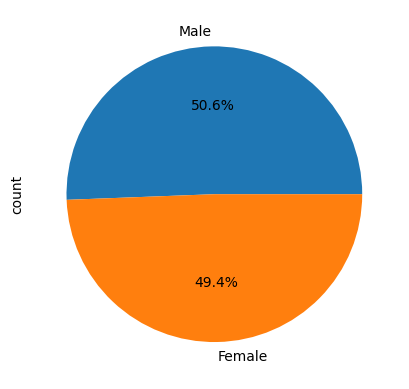

In [161]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ['Female', 'Male']
sizes = [49.392498, 50.607502]

# Make the pie chart
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
def get_final_tumor_volume(df):
    # Get the last (greatest) timepoint for each mouse
    last_timepoints = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    
    # Merging with the original DataFrame to get the tumor volume at the last timepoint
    final_tumor_df = pd.merge(last_timepoints, df, on=['Mouse ID', 'Timepoint'], how='left')
    
    return final_tumor_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Get the final tumor volume for each regimen
Capomulin_final = get_final_tumor_volume(Capomulin_df)
Ramicane_final = get_final_tumor_volume(Ramicane_df)
Infubinol_final = get_final_tumor_volume(Infubinol_df)
Ceftamin_final = get_final_tumor_volume(Ceftamin_df)

# Combine results into a single DataFrame
final_tumor_volumes = pd.concat([Capomulin_final, Ramicane_final, Infubinol_final, Ceftamin_final])
# Create a list of the four treatment groups
treatment_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

print(final_tumor_volumes)
print(treatment_groups)

   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      b128    Capomulin           38.982878
1      b742    Capomulin           38.939633
2      f966    Capomulin           30.485985
3      g288    Capomulin           37.074024
4      g316    Capomulin           40.159220
..      ...          ...                 ...
20     x226     Ceftamin           45.000000
21     x581     Ceftamin           64.634949
22     x822     Ceftamin           61.386660
23     y769     Ceftamin           68.594745
24     y865     Ceftamin           64.729837

[100 rows x 3 columns]
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Dictionary to store potential outliers for each treatment
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_vol = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(treatment_vol)
    
    # Calculate the IQR
    quartiles = treatment_vol.quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile - lowerquartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerquartile - (1.5 * iqr)
    upper_bound = upperquartile + (1.5 * iqr)
    
    # Find potential outliers
    outliers = treatment_vol[(treatment_vol < lower_bound) | (treatment_vol > upper_bound)]
    potential_outliers[treatment] = outliers

# Print potential outliers
for treatment, outliers in potential_outliers.items():
    print(f"{treatment}'s potential outliers: {outliers if not outliers.empty else 'Series([], Name: Tumor Volume (mm3), dtype: float64)'}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


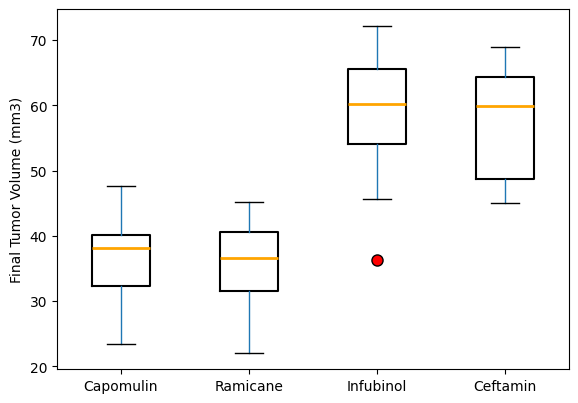

In [164]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#  Put treatments into a list for the boxplot display
treatment_order = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Converting the 'Drug Regimen' to a categorical type with the specified order
filtered_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(treatment_order)]
filtered_data['Drug Regimen'] = pd.Categorical(filtered_data['Drug Regimen'], categories=treatment_order, ordered=True)


# Create a box plot
# Black outline
boxprops = dict(linewidth=1.5, color='black')  
 # Orange median line
medianprops = dict(color='orange', linewidth=2) 
# Red dots with black edge
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=8)  

# Use the categorical order for plotting
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, 
                      boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)

#  Remove the default title
plt.title('')
plt.suptitle('')  
plt.xlabel('')
#Adding Title to y axis
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

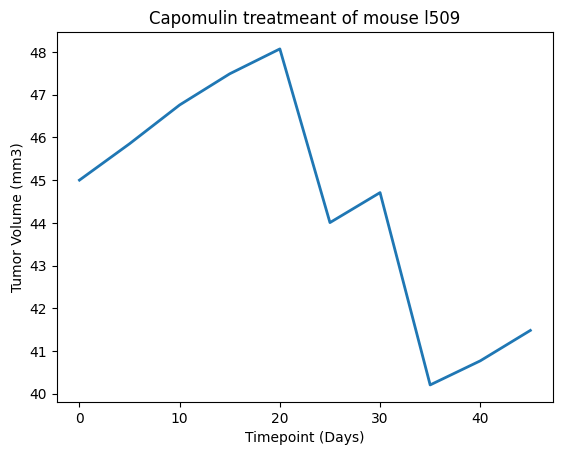

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter data for specific mouse id
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

#Creating the plot
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2)
#Creating Labels
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
#Display line plot
plt.show()

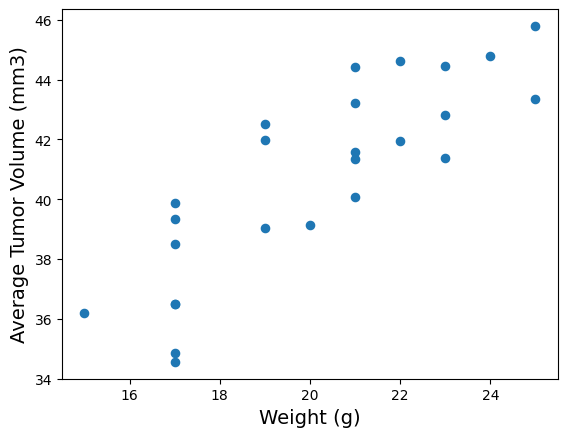

In [169]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Convert columns to numeric and coercing errors to Nan
Capomulin_df['Weight (g)'] = pd.to_numeric(Capomulin_df['Weight (g)'],errors='coerce')
Capomulin_df['Tumor Volume (mm3)'] = pd.to_numeric(Capomulin_df['Tumor Volume (mm3)'],errors='coerce')

# Checking and dropping missing values
Capomulin_df = Capomulin_df.dropna(subset=['Weight (g)', 'Tumor Volume (mm3)'])

# Group by Mouse ID 
# Calculate the average for each group
avg_capm_vol = Capomulin_df.groupby('Mouse ID').mean(numeric_only=True)

# Creating the scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], s=35)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


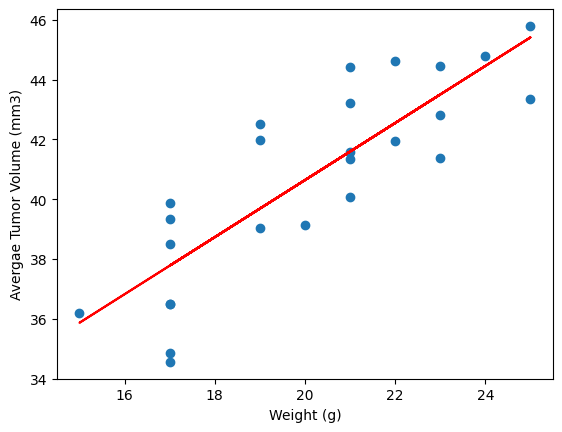

In [168]:
# Calculate the correlation coefficient and a linear regression model
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weights = avg_capm_vol["Weight (g)"]
tumor_volumes = avg_capm_vol["Tumor Volume (mm3)"]

# Performing the linear regression
slope, intercept, r_value, p_value, std_err = linregress(weights, tumor_volumes)

# Creating the regression line values
regress_values = weights * slope + intercept

# Creating the scatter plot
plt.scatter(weights, tumor_volumes, label='Data Points')

# Plot the regression line
plt.plot(weights, regress_values, color='red', label='Fit Line')

#Setting Labels
plt.xlabel("Weight (g)")
plt.ylabel("Avergae Tumor Volume (mm3)")

#Display the plot
plt.show()